In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import csv
import statsmodels as sm


## import the Genchart data and split it based on the fuel type 


In [3]:
def csv_reader(filepath, dataname):
    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    
    globals()[dataname] = data


def chart_to_dataframe(data_name, data):
    df_name = 'df_' + data_name
    globals()[df_name] = pd.DataFrame(data[1:], columns=data[0])
    
    if 'Date_MST' in globals()[df_name].columns:
        date_column = 'Date_MST'
    else:
        date_column = '\ufeffDate_MST'
    
    globals()[df_name][date_column] = pd.to_datetime(globals()[df_name][date_column]).dt.date
    globals()[df_name]['Measure_Values'] = pd.to_numeric(globals()[df_name]['Measure_Values'], errors='coerce').astype(float)
    
    return globals()[df_name]

In [6]:
path_genchart = r'C:\Users\amer_\Documents\GitHub\Energy_Consumption\Data\Gen Chart_data_month.csv' #change based on your file path

csv_reader(path_genchart, 'genchart_data')
df_genchart_data = chart_to_dataframe('genchart_data', genchart_data)

## create separate dataframes for each type of energy

In [22]:
#fix small problem with the naming of Fuel_Type column 
df_genchart_data.rename(columns={'\ufeffFuel_Type': 'Fuel_Type'}, inplace=True)

#group Fueltype
grouped_data = df_genchart_data.groupby('Fuel_Type')

# Create a dictionary to store the separate groups
fuel_type_dataframes = {}

# Iterate over each group and create separate DataFrames
for fuel_type, group in grouped_data:
    fuel_type_dataframes[fuel_type] = group.copy().reset_index(drop=True)

Coal_dataframe = fuel_type_dataframes['Coal']
Cogeneration_dataframe = fuel_type_dataframes['Cogeneration']
Combined_Cycle_dataframe = fuel_type_dataframes['Combined Cycle']
Dual_Fuel_dataframe = fuel_type_dataframes['Dual Fuel']
Gas_Fired_Steam_dataframe = fuel_type_dataframes['Gas Fired Steam']
Hydro_dataframe = fuel_type_dataframes['Hydro']#renewable
Other_dataframe = fuel_type_dataframes['Other']
Simple_Cycle_dataframe = fuel_type_dataframes['Simple Cycle']
Solar_dataframe = fuel_type_dataframes['Solar']#renewable
Storage_dataframe = fuel_type_dataframes['Storage']
Wind_dataframe = fuel_type_dataframes['Wind']#renewable



## create 4 dataframes with the following classifications:
- renewable before 2019
- renewable after 2019
- non-renewable before 2019
- non-renewable after 2019


In [32]:
renewable_prior_2019 = pd.concat([Hydro_dataframe, Solar_dataframe, Wind_dataframe])
renewable_prior_2019 = renewable_prior_2019[renewable_prior_2019['Date_MST'] < pd.to_datetime('2019-01-01')]

renewable_after_2019 = pd.concat([Hydro_dataframe, Solar_dataframe, Wind_dataframe])
renewable_after_2019 = renewable_after_2019[renewable_after_2019['Date_MST'] >= pd.to_datetime('2019-01-01')]


non_renewable_prior_2019 = pd.concat([Coal_dataframe, 
                                      Cogeneration_dataframe,
                                      Combined_Cycle_dataframe,
                                      Dual_Fuel_dataframe,
                                      Gas_Fired_Steam_dataframe,
                                      Simple_Cycle_dataframe,
                                      Storage_dataframe
                                      ])
non_renewable_prior_2019 = non_renewable_prior_2019[non_renewable_prior_2019['Date_MST'] < pd.to_datetime('2019-01-01')]

non_renewable_after_2019 = pd.concat([Coal_dataframe, 
                                      Cogeneration_dataframe,
                                      Combined_Cycle_dataframe,
                                      Dual_Fuel_dataframe,
                                      Gas_Fired_Steam_dataframe,
                                      Simple_Cycle_dataframe,
                                      Storage_dataframe
                                      ])
non_renewable_after_2019 = non_renewable_prior_2019[non_renewable_prior_2019['Date_MST'] >= pd.to_datetime('2019-01-01')]

C:\Users\amer_\AppData\Local\Temp\ipykernel_7444\2068007052.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  renewable_prior_2019 = renewable_prior_2019[renewable_prior_2019['Date_MST'] < pd.to_datetime('2019-01-01')]
C:\Users\amer_\AppData\Local\Temp\ipykernel_7444\2068007052.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  renewable_after_2019 = renewable_after_2019[renewable_after_2019['Date_MST'] >= pd.to_datetime('2019-01-01')]
C:\Users\amer_\AppData\Local\Temp\ipykernel_7444\2068007052.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to matc

In [33]:
non_renewable_after_2019

,Fuel_Type,Date_MST,Measure_Names,Measure_Values


## Create Visuals for each fueltype over time 

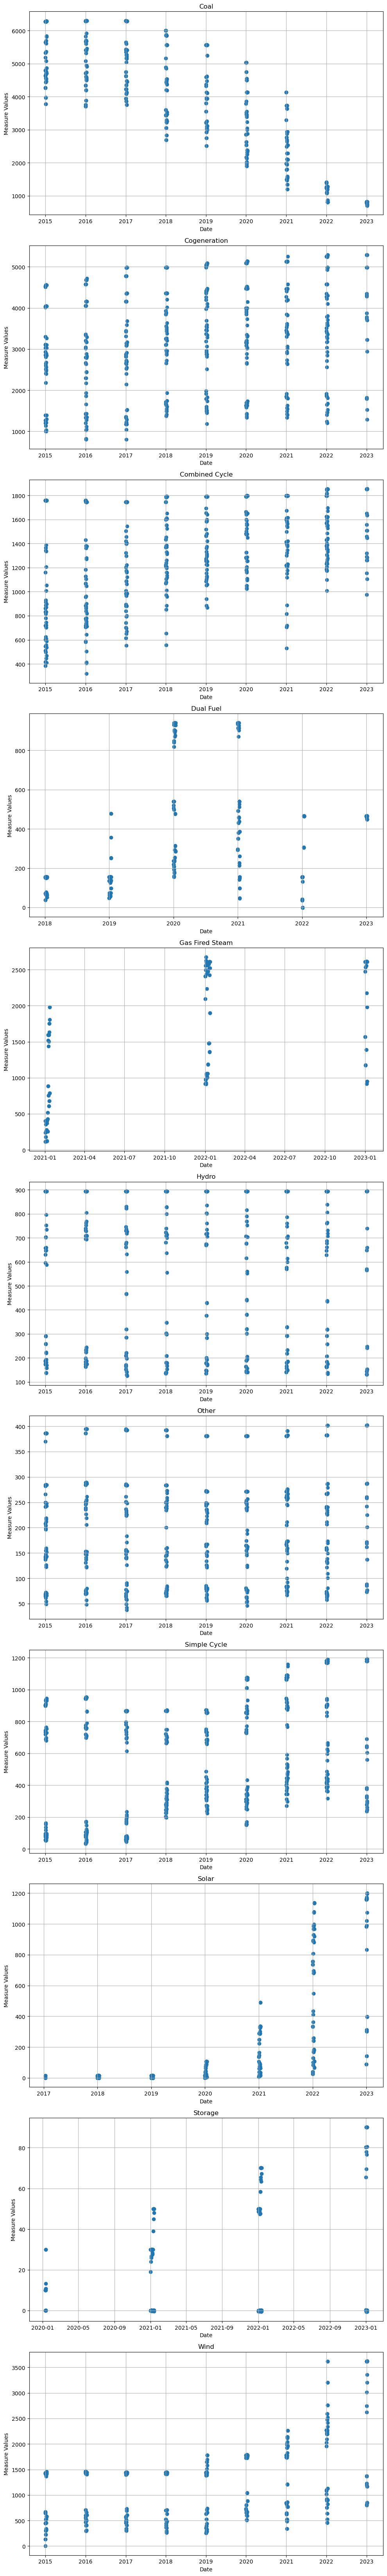

In [14]:
fig, axes = plt.subplots(len(fuel_type_dataframes), 1, figsize=(10, 6 * len(fuel_type_dataframes)))

# Iterate over fuel types and create scatterplot for each one
for i, (fuel_type, dataframe) in enumerate(fuel_type_dataframes.items()):
    ax = axes[i] if len(fuel_type_dataframes) > 1 else axes  # Handle single subplot case
    ax.scatter(dataframe['Date_MST'], dataframe['Measure_Values'])
    ax.set_title(fuel_type)
    ax.set_xlabel('Date')
    ax.set_ylabel('Measure Values')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [20]:
grouped = df_genchart_data.groupby(['Fuel_Type',]).aggregate(
    {'Fuel_Type': 'count', 'Measure_Values': 'mean',})

grouped

,Fuel_Type,Measure_Values
Fuel_Type,,
Coal,505,3831.794812
Cogeneration,505,3448.002829
Combined Cycle,505,1417.304980
Dual Fuel,280,356.546944
Gas Fired Steam,140,1514.988573
Hydro,505,582.855805
Other,505,223.489154
Simple Cycle,505,645.700382
Solar,330,205.268231
